In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mne

from mne.datasets import sample

import sys
import os
from os import path

os.chdir("/home/fm02/MEG_NEOS/NEOS")
import NEOS_config as config
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stc_path = path.join(config.data_path, "stcs")
subjects_dir = config.subjects_dir
labels_dir = path.join(config.data_path, "my_ROIs")
labels_path = path.join(config.data_path, "my_ROIs")

In [3]:
fname_fsaverage_src = path.join(subjects_dir,
                                'fsaverage',
                                'bem', 
                                'fsaverage-ico-5-src.fif')
src = mne.read_source_spaces(fname_fsaverage_src)

    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read


In [4]:
times=np.arange(-300,701,1)

rois_lab = ['lATL',
            'rATL', 
            'PVA',
            'IFG',
            'AG',
            'PTC']

stc_rois = dict()
avgs = dict()

for roi in rois_lab:
    stc_rois[roi] = [] 
    avgs[roi] = []
    
sbj_ids = [1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,
           21,22,23,24,25,26,27,28,29,30]

In [5]:
for sbj in sbj_ids:
    
    stc = mne.read_source_estimate(path.join(stc_path, f'{sbj}_stc_predictable_fsaverage'))
    
    lATL = mne.read_label(path.join(labels_path, 'l_ATL_fsaverage-lh.label'),
                          subject='fsaverage')
    lATL.name='lATL'
    rATL = mne.read_label(path.join(labels_path, 'r_ATL_fsaverage-rh.label'),
                          subject='fsaverage')
    rATL.name='rATL'
    PVA = mne.read_label(path.join(labels_path, 'PVA_fsaverage-lh.label'),
                          subject='fsaverage')
    PVA.name='PVA'
    IFG = mne.read_label(path.join(labels_path, 'IFG_fsaverage-lh.label'),
                          subject='fsaverage')
    IFG.name='IFG'
    AG = mne.read_label(path.join(labels_path, 'AG_fsaverage-lh.label'),
                          subject='fsaverage')
    AG.name='AG'
    PTC = mne.read_label(path.join(labels_path, 'PTC_fsaverage-lh.label'),
                          subject='fsaverage')
    PTC.name='PTC'

    rois = [lATL,
            rATL, 
            PVA,
            IFG,
            AG,
            PTC]
    
    for roi in rois:
        stc_rois[roi.name].append(stc.in_label(roi))
        avgs[roi.name].append(stc.extract_label_time_course(roi, src, mode='mean'))        
    

Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)


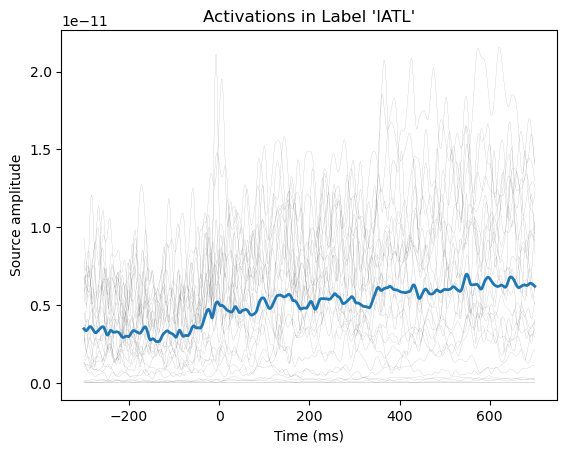

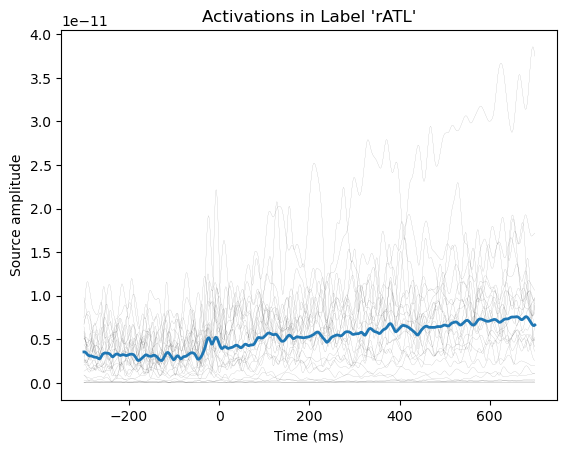

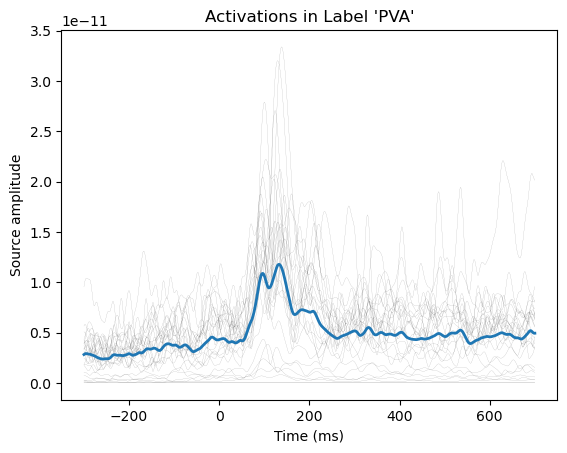

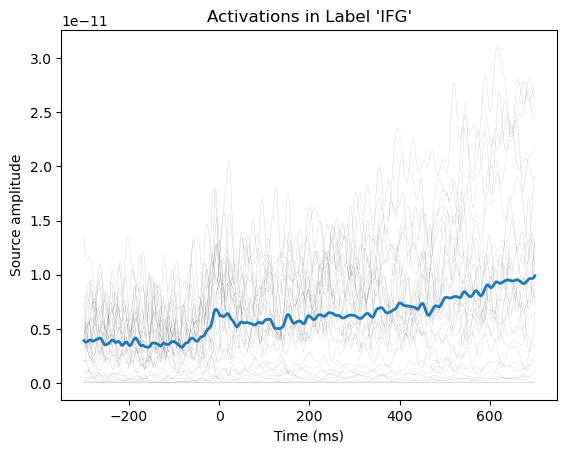

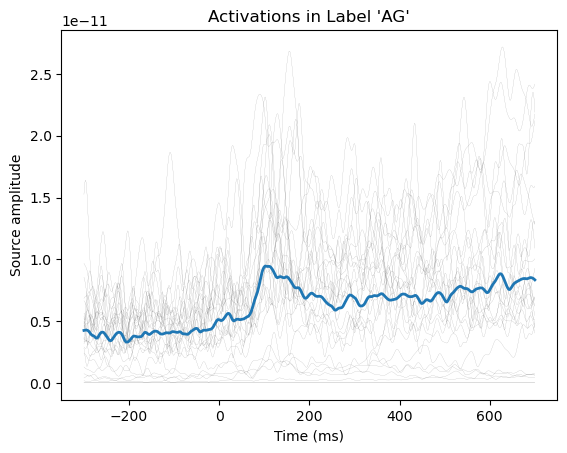

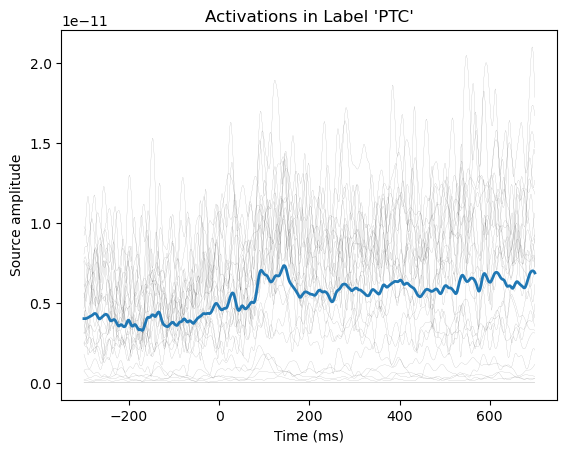

In [6]:
for roi in rois:

    fig, ax = plt.subplots(1);
    for i in range(0, 27):
        ax.plot(times, avgs[roi.name][i].T, 'k', linewidth=0.1, alpha=0.5);
    ax.plot(times, np.concatenate(avgs[roi.name]).mean(axis=0), linewidth=2)
    ax.set(xlabel='Time (ms)', ylabel='Source amplitude',
       title='Activations in Label %r' % (roi.name))
    plt.show()

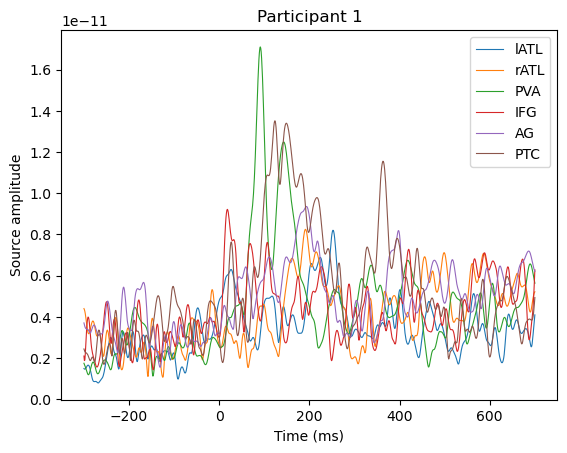

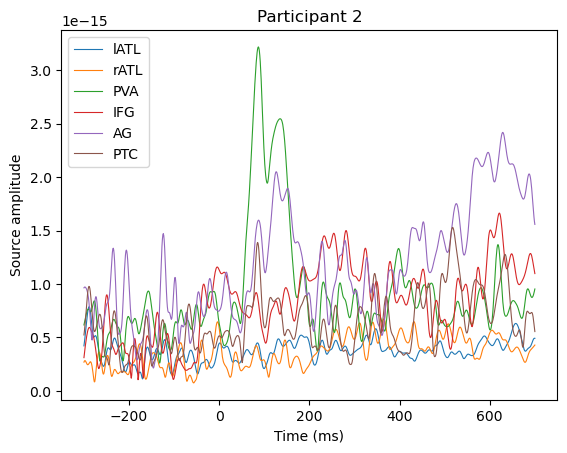

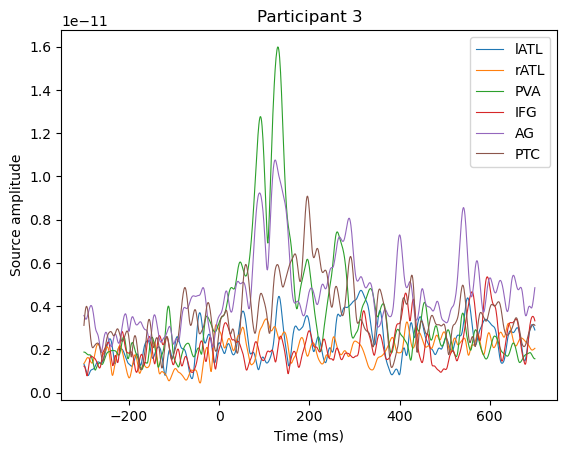

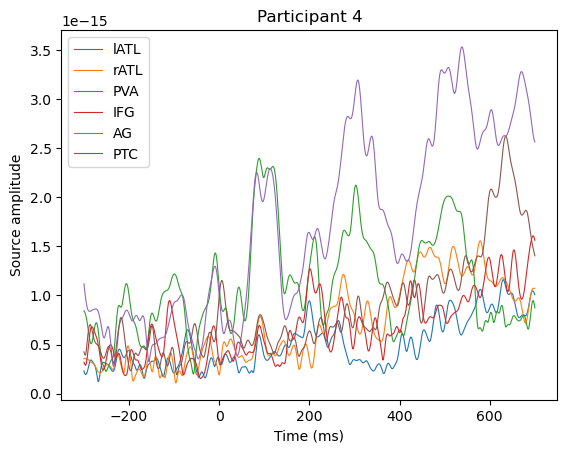

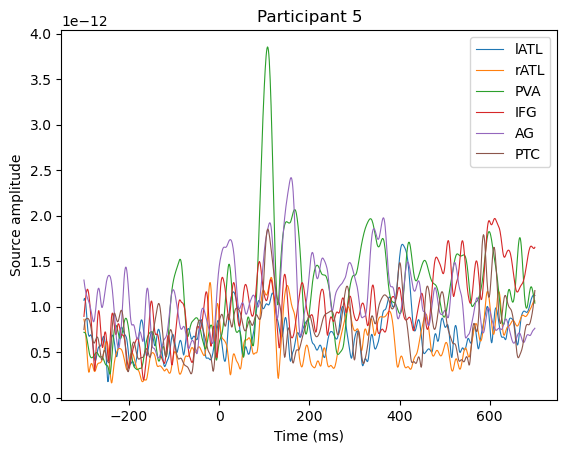

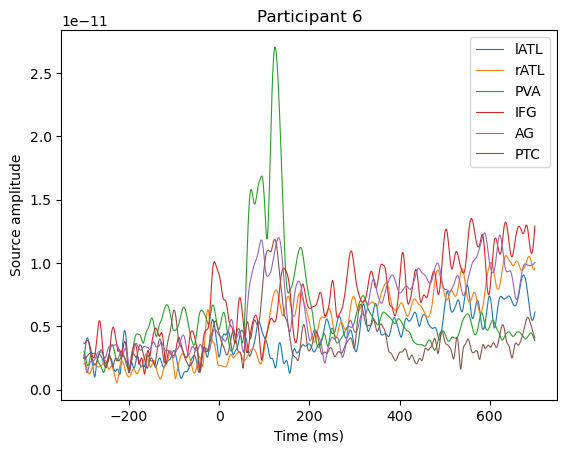

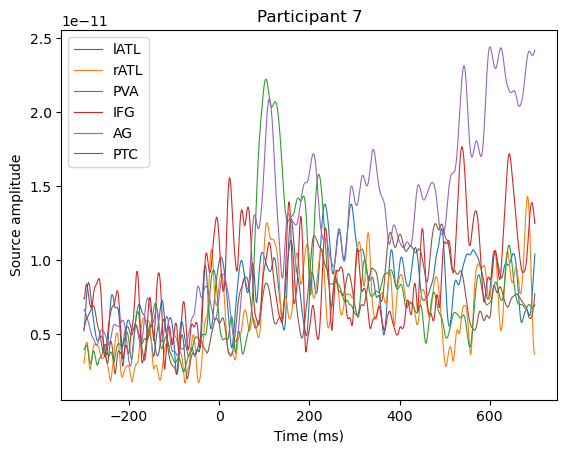

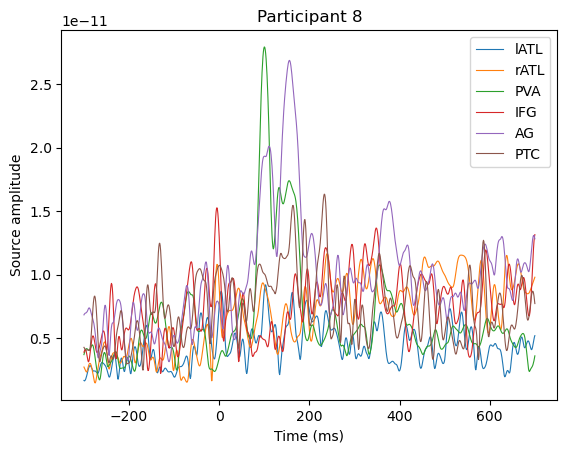

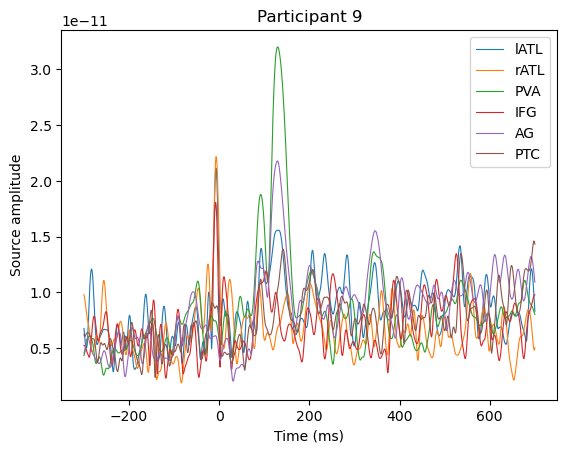

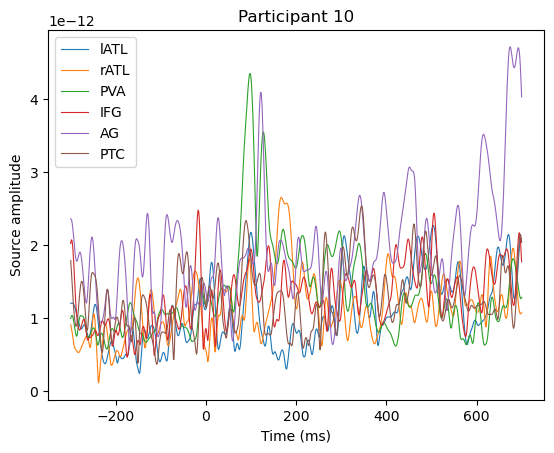

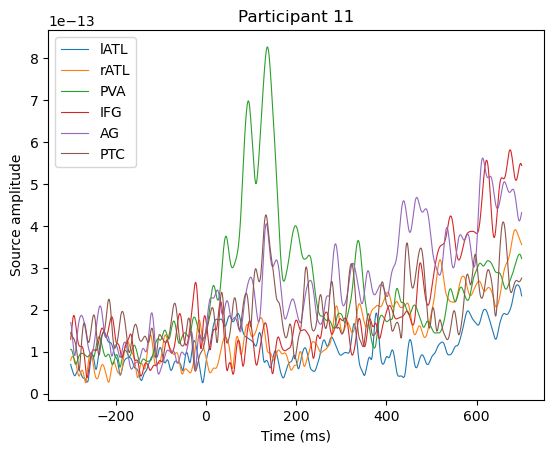

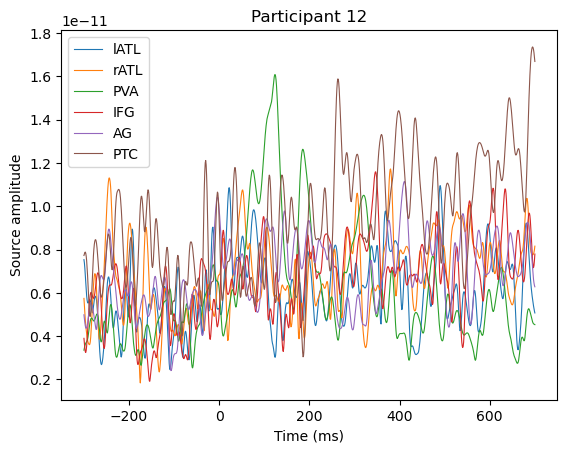

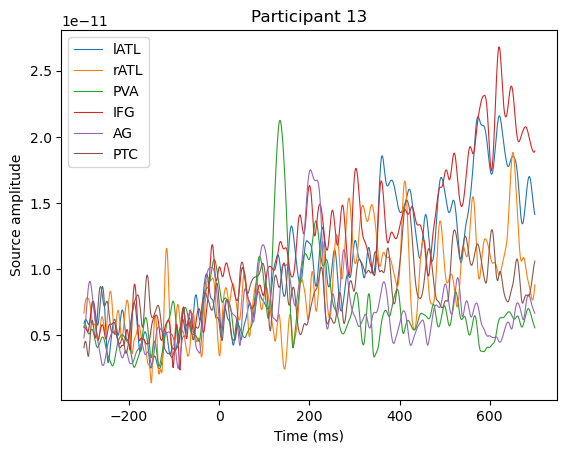

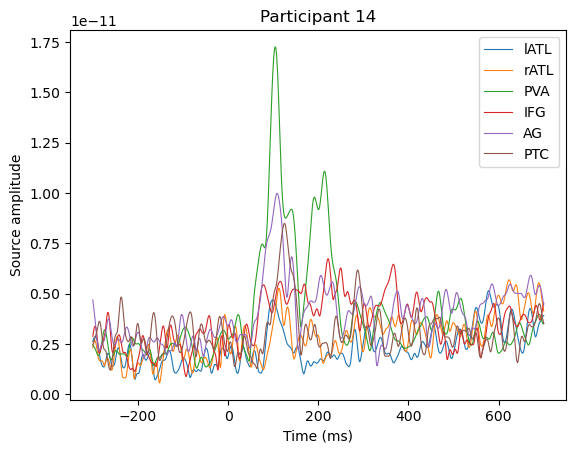

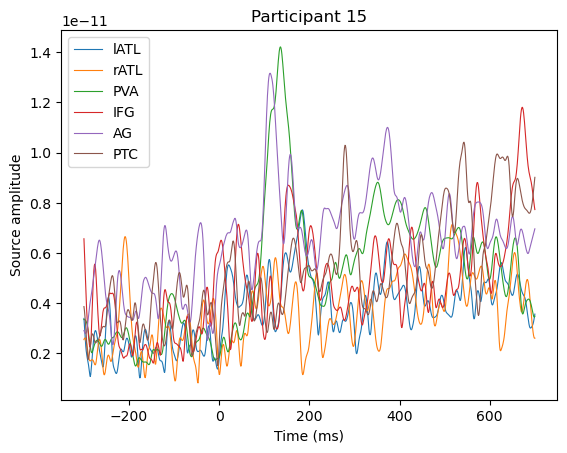

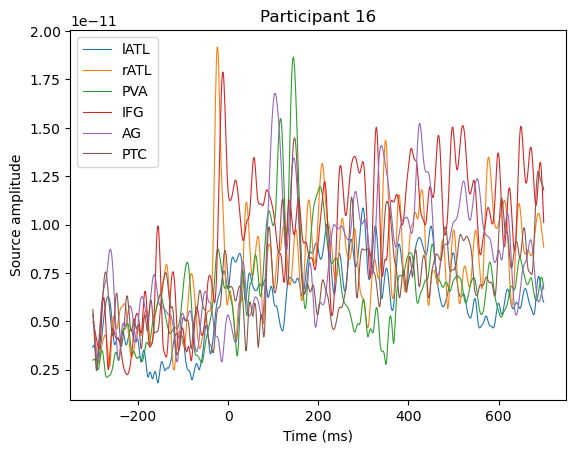

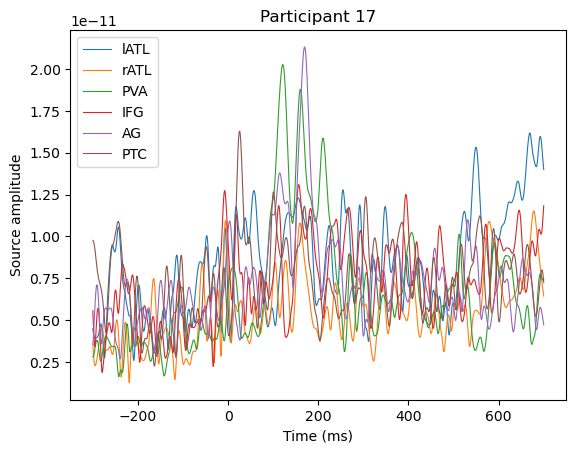

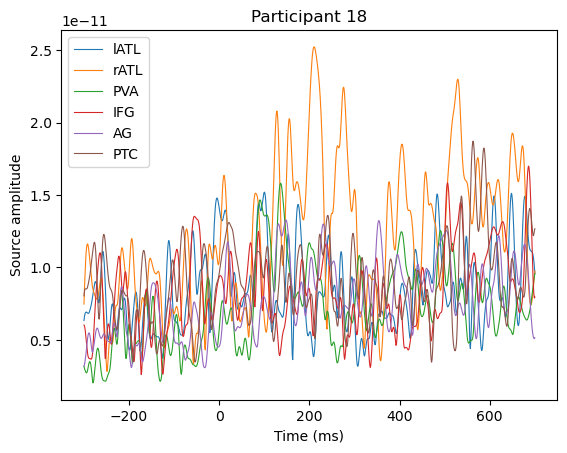

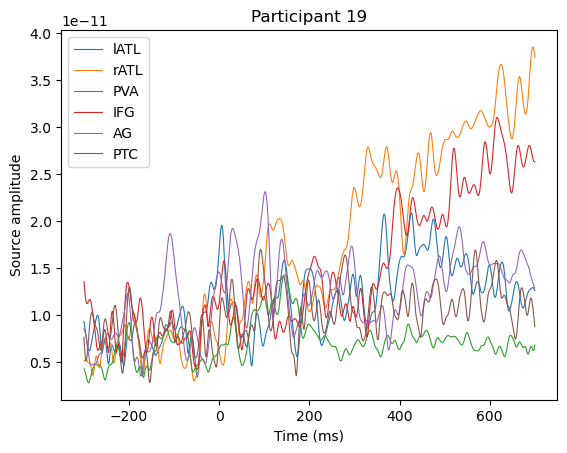

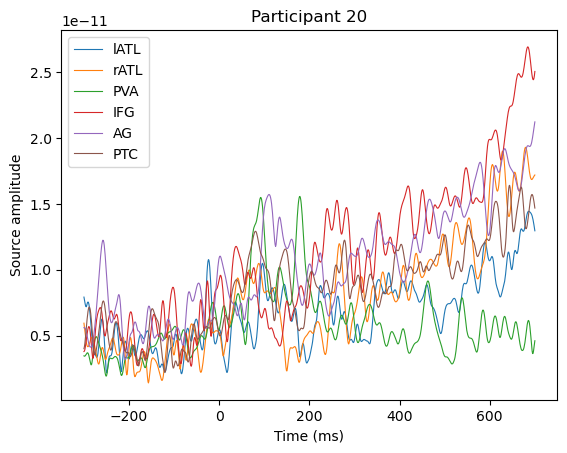

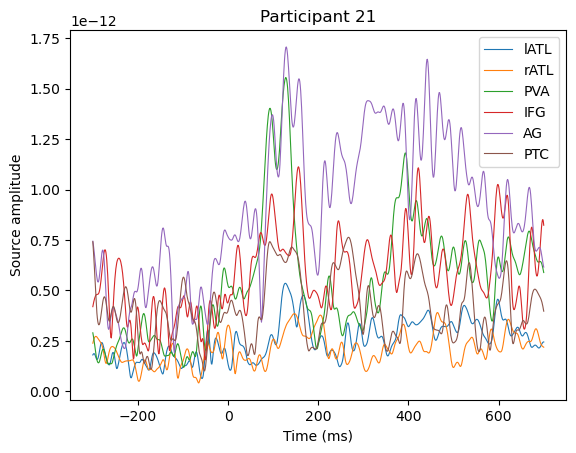

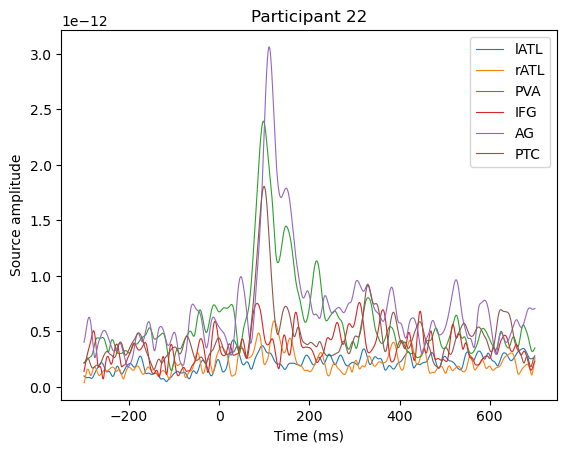

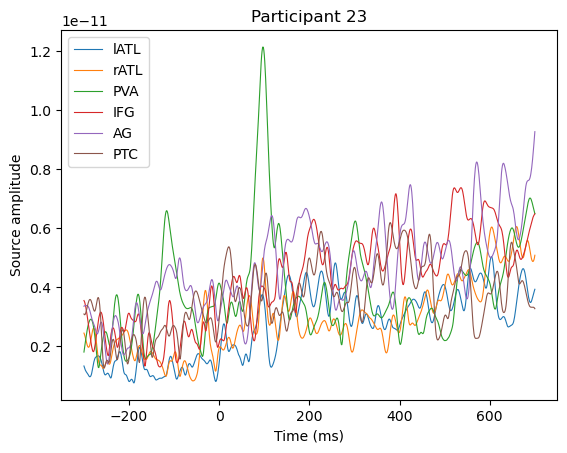

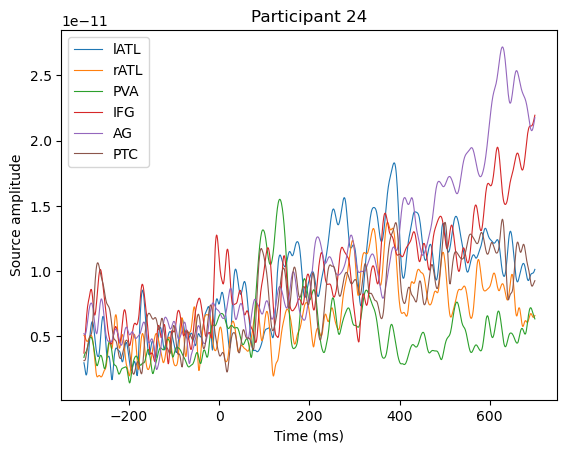

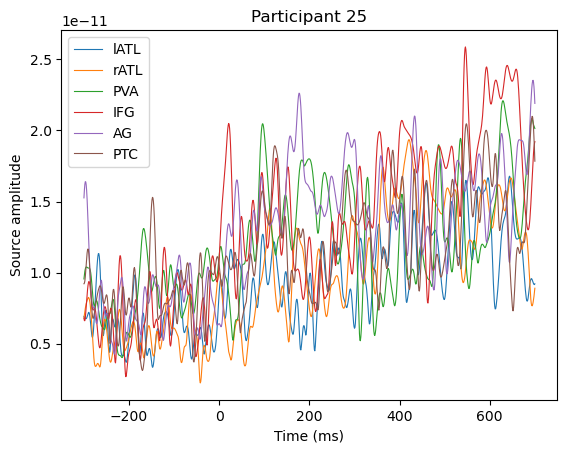

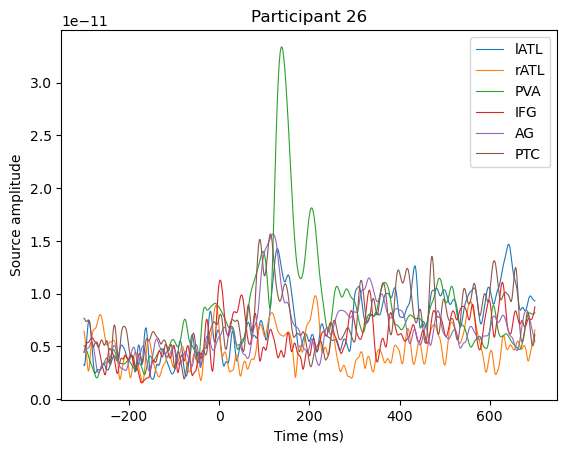

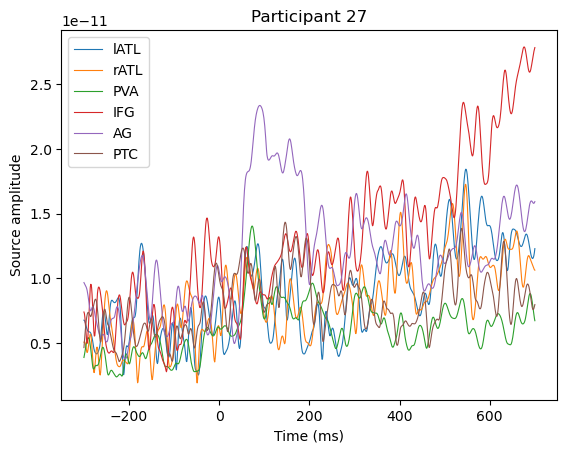

In [16]:
for sbj in range(0, 27):
    fig, ax = plt.subplots(1);
    for roi in rois:
        ax.plot(times, np.concatenate(avgs[roi.name][sbj]), linewidth=.8, label=roi.name)
    ax.set(xlabel='Time (ms)', ylabel='Source amplitude',
       title=f'Participant {sbj+1}')
    plt.legend();
    plt.show()

In [12]:
plt.close('all')

In [17]:
stc_rois_unp = dict()
avgs_unp = dict()

for roi in rois_lab:
    stc_rois_unp[roi] = [] 
    avgs_unp[roi] = []

In [18]:
for sbj in sbj_ids:
    
    stc = mne.read_source_estimate(path.join(stc_path, f'{sbj}_stc_unpredictable_fsaverage'))
    
    lATL = mne.read_label(path.join(labels_path, 'l_ATL_fsaverage-lh.label'),
                          subject='fsaverage')
    lATL.name='lATL'
    rATL = mne.read_label(path.join(labels_path, 'r_ATL_fsaverage-rh.label'),
                          subject='fsaverage')
    rATL.name='rATL'
    PVA = mne.read_label(path.join(labels_path, 'PVA_fsaverage-lh.label'),
                          subject='fsaverage')
    PVA.name='PVA'
    IFG = mne.read_label(path.join(labels_path, 'IFG_fsaverage-lh.label'),
                          subject='fsaverage')
    IFG.name='IFG'
    AG = mne.read_label(path.join(labels_path, 'AG_fsaverage-lh.label'),
                          subject='fsaverage')
    AG.name='AG'
    PTC = mne.read_label(path.join(labels_path, 'PTC_fsaverage-lh.label'),
                          subject='fsaverage')
    PTC.name='PTC'

    rois = [lATL,
            rATL, 
            PVA,
            IFG,
            AG,
            PTC]
    
    for roi in rois:
        stc_rois_unp[roi.name].append(stc.in_label(roi))
        avgs_unp[roi.name].append(stc.extract_label_time_course(roi, src, mode='mean'))        
    

Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)
Extracting time courses for 1 labels (mode: mean)


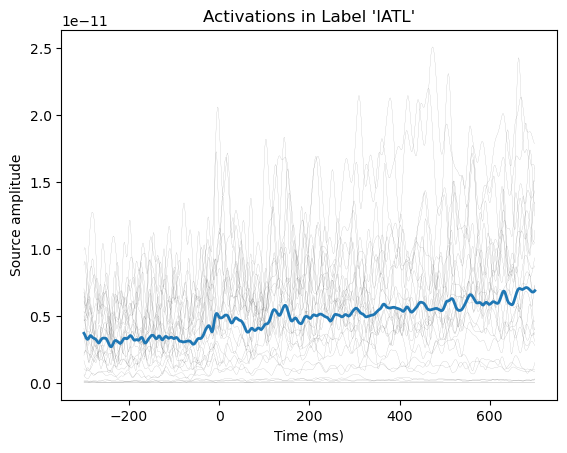

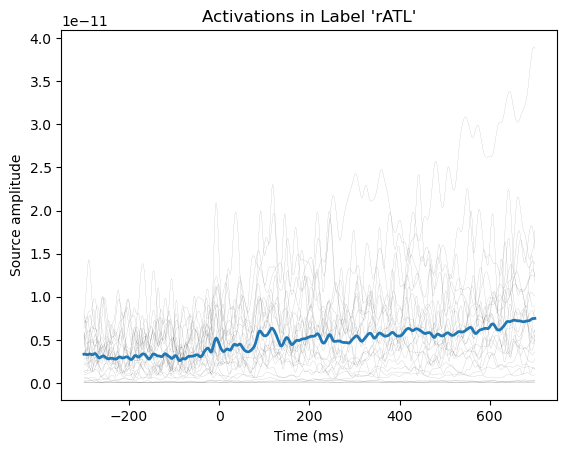

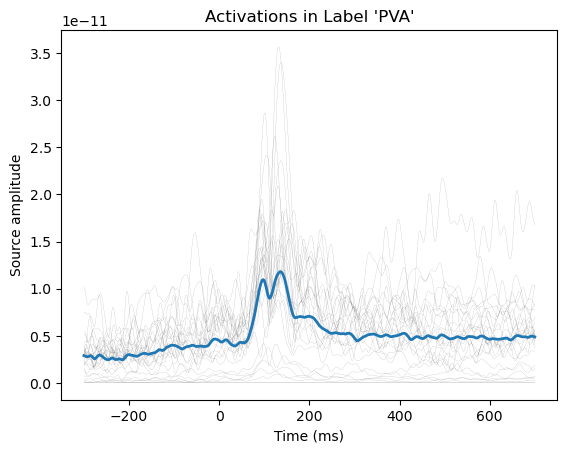

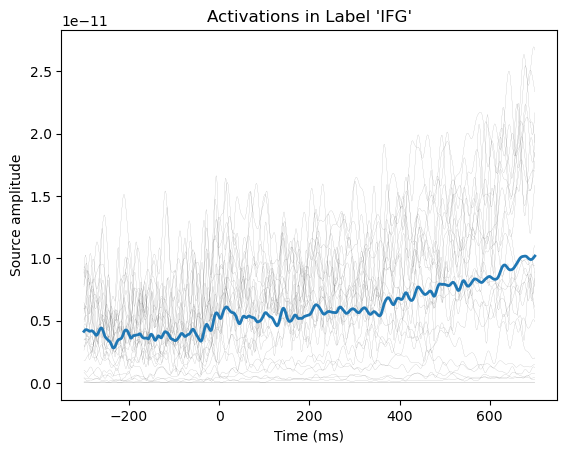

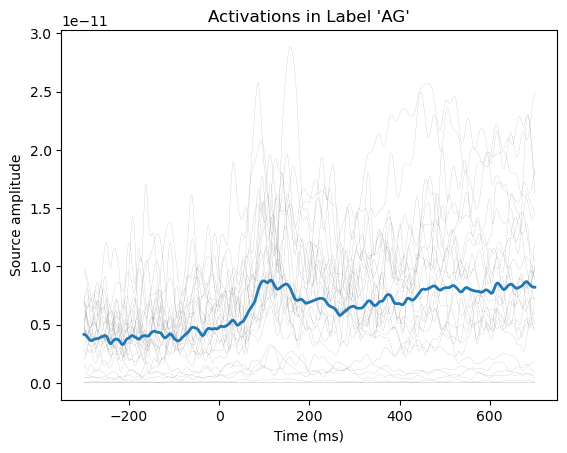

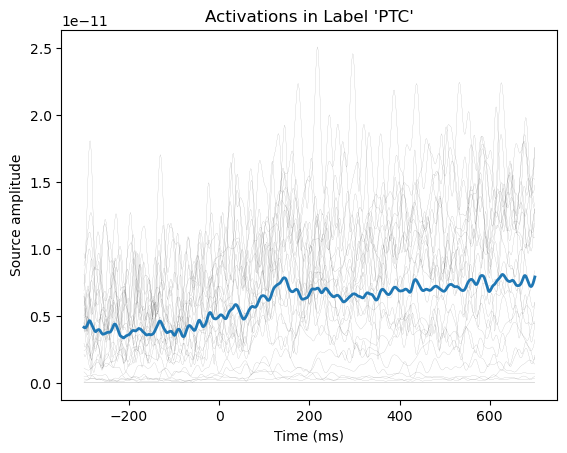

In [19]:
for roi in rois:

    fig, ax = plt.subplots(1);
    for i in range(0, 27):
        ax.plot(times, avgs_unp[roi.name][i].T, 'k', linewidth=0.1, alpha=0.5);
    ax.plot(times, np.concatenate(avgs_unp[roi.name]).mean(axis=0), linewidth=2)
    ax.set(xlabel='Time (ms)', ylabel='Source amplitude',
       title='Activations in Label %r' % (roi.name))
    plt.show()